# **7주차 - 1, 2** : 담금질 시늉, 세일즈맨 문제

# Simulated Annealing(담금질 시늉)

**세일즈맨 문제**

본인의 집(0,0)에서 출발하여 50개 지점에 택배 물품을 전달하고 다시 집(0,0)으로 돌아오는 길의 최적 방문 순서 찾기

1. 초기 조건 & 50개 지점의 초기 좌표 만들기
2. 전체 거리 계산하는 함수 만들기 : **distance**

  > $D = \displaystyle\sum_{i=0}^{N-1}|\overrightarrow{r_{i+1}}-\overrightarrow{r_i}|$


3. 초기 좌표에 대한 전체 거리와 방문 순서 그래프로 만들기
4. 임의의 두 개의 지점(i, j)의 순서를 바꿔주는 함수 만들기 : **swap**
5. 지점 i와 지점 j의 순서를 바꾸었을 때, 거리가 작아지면 순서 바꾸기 성공 !
6. 그 외(작아지지 않을 때)의 경우, 확률에 따라 순서를 바꾸는 것을 허용할 지 OR 하지 않을지 결정 !

  > $P = e^{-ΔD/T}$


7. 온도의 max에서 온도의 min이 될 때까지 계속 실행한다.
8. 최적화된 거리와 최적 방문 순서에 대한 그래프를 그려보기

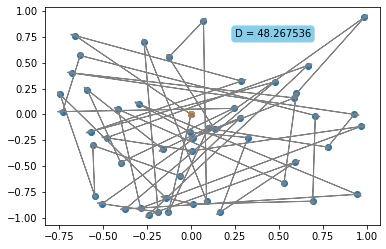

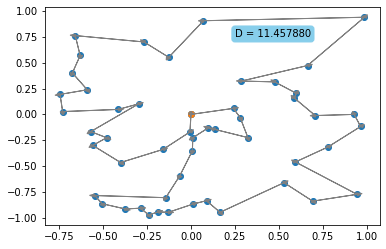

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 전체 거리 계산하는 함수 !!
def distance():
  D = 0
  for i in range(N+1):
    D += np.sqrt((r[i+1][0]-r[i][0])**2 + (r[i+1][1]-r[i][1])**2)
  return(D)

# i 위치와 j 위치 바꾸는 합수 !!
def swap(i,j):
  s = [r[i][0],r[i][1]]; r[i] = r[j]; r[j] = s

# 초기 조건
N = 50; Tmin = 1e-10; Tmax = 100; t = 0
T = Tmax * np.exp(-t/100000)

# -1 ~ 1 의 N개의 초기 2차원 좌표 만들기
np.random.seed(2)
r = [[0,0] for i in range(N+2)]
for i in range(1,N+1):
  r[i] = np.random.rand(2)*2-1
r = np.array(r)

# 초기 이동 거리 & 그림 그리기
D_ini = distance()
plt.scatter(r[:,0],r[:,1])
plt.scatter(0,0)
for i in range(N+1):
  x1 = float(r[i][0]); x2 = float(r[i+1][0])
  y1 = float(r[i][1]); y2 = float(r[i+1][1])
  dx = x2-x1; dy = y2-y1
  plt.arrow(x1, y1, dx, dy,width = 0.0005, head_width = 0.03, head_length = 0.03,color = 'gray')
plt.text(x=0.25,y=0.75,s='D = %f'%(D_ini),bbox=dict(boxstyle='round',color='skyblue'))
plt.show()

# 실행 !!
while T > Tmin:
  D_past = distance()
  ## 바꾸기
  i = np.random.randint(1,N)   ### index 주의
  j = np.random.randint(1,N-1)   ### index 주의
  if i == j:
    j = N   ### index 주의
  swap(i,j); D = distance()
  ## 전이 허용 X
  if D > D_past :
    if np.random.rand() > np.exp(-(D - D_past)/T):
      swap(i,j); D = D_past
  t+=1; T = Tmax * np.exp(-t/100000)   ### 온도 변화에 민감하게

# 최단 거리 & 그림 그리기
plt.scatter(r[:,0],r[:,1])
plt.scatter(0,0)
for i in range(N+1):
  x1 = float(r[i][0]); x2 = float(r[i+1][0])
  y1 = float(r[i][1]); y2 = float(r[i+1][1])
  dx = x2-x1; dy = y2-y1
  plt.arrow(x1, y1, dx, dy,width = 0.0005, head_width = 0.03, head_length = 0.03,color = 'gray')
plt.text(x=0.25,y=0.75,s='D = %f'%(D),bbox=dict(boxstyle='round',color='skyblue'))
plt.show()